In [9]:
import requests
from scrapy.http import TextResponse
import scrapy
import pandas as pd
import numpy as np
import time
from selenium import webdriver
import quandl
from dbnomics import fetch_series
import json
from scrapy.crawler import CrawlerProcess
from selenium import webdriver

In [ ]:
Problem 1

In [66]:
PATH = r"C:\Users\mherv\Downloads\chromedriver_win32\chromedriver.exe"
def scrapRateAM():
    browser = webdriver.Chrome(PATH)
    URL = 'http://rate.am/am/armenian-dram-exchange-rates/central-bank-armenia'
    browser.get(URL)
    time.sleep(2)
    data = {}
    
    for y in range(2018,2021):
        browser.find_element_by_css_selector("select[name='ctl00$Content$dlYear']").click()
        time.sleep(2)
        browser.find_element_by_css_selector(f"option[value='{y}']").click()
        time.sleep(2)
        for e in ["USD", "EUR", "RUR","GBP"]:
            browser.find_element_by_css_selector("select[name='ctl00$Content$dlCurrency']").click()
            time.sleep(2)
            browser.find_element_by_css_selector(f"option[value={e}]").click()
            time.sleep(2)
            page = browser.page_source
            response = TextResponse(body=page,url=URL,encoding="utf-8")
            data.update({e+str(y):scrap_one_page(response,y,e)})

    browser.close()
    return data

In [67]:
def scrap_one_page(response,year,exchange):
    table = response.css("table[class='cb']")
    rows = table.css("tbody>tr")
    data = []
    for i in range(1,32):
        rowData = {'Day':'','January':'','February':'','March':'','April':'','May':'','June':'','July':'','August':'','September':'','October':'','November':'','December':''}
        for index, key in enumerate(rowData):
            text = rows[i].css(f"td:nth-child({index+1})::text").extract()
            if len(text)==0:
                text = ''
            else:
                if text[0].strip()=='X' or text[0].strip()=='':
                    text = ''
                else:
                    text = float(text[0].strip())
            rowData[key] = text
        data.append(rowData)
   
    return pd.DataFrame(data)

In [68]:
data = scrapRateAM()

In [47]:
def getVariation(year,exchange):
    nums = []
    for label, content in data[f"{exchange + str(year)}"].iteritems():
        if label != 'Day':
             for i in content:
                if i!='':
                    nums.append(i)
    return max(nums)-min(nums)

In [48]:
#change year and exchange to get variation for others
getVariation(2019,"USD")

[483.75, 483.75, 483.75, 483.75, 483.75, 483.75, 484.37, 484.79, 485.52, 485.98, 485.98, 486.41, 486.63, 486.58, 485.81, 485.42, 485.42, 485.11, 485.17, 485.18, 485.78, 485.75, 485.75, 485.75, 486.54, 486.45, 486.98, 487.07, 487.07, 487.44, 487.65, 488.26, 488.69, 489.19, 489.19, 489.85, 489.62, 488.85, 487.99, 487.51, 487.51, 487.43, 487.5, 487.59, 488.07, 488.71, 488.71, 488.83, 488.93, 489.38, 489.72, 490.18, 490.18, 490.68, 490.6, 489.76, 489.08, 489.08, 489.08, 488.57, 488.09, 487.35, 486.75, 486.63, 486.63, 486.52, 486.27, 485.91, 486.1, 485.86, 485.86, 485.98, 486.15, 486.31, 486.31, 486.44, 486.44, 486.42, 486.47, 486.85, 487.29, 487.42, 487.42, 487.32, 486.54, 485.83, 485.01, 485.02, 485.02, 484.75, 484.33, 483.4, 482.85, 482.31, 482.31, 481.98, 481.56, 481.56, 481.57, 481.33, 481.33, 481.26, 480.48, 480.48, 480.46, 480.75, 480.75, 481.29, 481.64, 481.96, 481.96, 482.17, 482.17, 481.33, 480.85, 480.52, 480.14, 479.72, 479.72, 480.03, 479.6, 479.64, 479.98, 480.03, 480.03, 480.

14.939999999999998

In [75]:
#calculating month to month difference
def monthly_difference(exchange):
    diff = []
    for i in data[f'{exchange}2019'].columns[1:]:
        diff.append(abs(data[f'{exchange}2019'][data[f'{exchange}2019'][i] != ''].mean()[i]-data[f'{exchange}2018'][data[f'{exchange}2018'][i] != ''].mean()[i]))
    return diff

In [76]:

diff = monthly_difference('USD')
print(max(diff)-min(diff))

6.600113960113731


In [ ]:
Problem 2

In [5]:
tsla_data = quandl.get("WIKI/TSLA")

In [21]:
tsla_data.pct_change().mean()['Open']

# average daily percentage change of the opening price is

0.0019498764186026505

In [20]:
tsla_data['Diff'] = tsla_data['High']-tsla_data['Low']
tsla_data.pct_change().median()['Diff']

# median daily percentage change of range between highest and lowest daily prices is

-0.016474576271185815

In [ ]:
Problem 3

In [70]:
#getting contry codes
URL = "https://www.iban.com/country-codes"
page = requests.get(URL)
response = TextResponse(body=page.text,url=URL,encoding="utf-8")
countries = response.css(".table tr td:nth-child(2)::text").extract()

In [83]:
#getting data for the countries that exist in the dbnomics database
data = {}
for i in countries:
    df = fetch_series(f"IMF/DOT/A.AM.TMG_CIF_USD.{i.upper()}");
    if not df.empty:
        data[i] = df

Could not load series: {'dataset_code': 'DOT', 'message': 'Could not load series', 'provider_code': 'IMF', 'series_code': 'A.AM.TMG_CIF_USD.AX'}
Could not load series: {'dataset_code': 'DOT', 'message': 'Could not load series', 'provider_code': 'IMF', 'series_code': 'A.AM.TMG_CIF_USD.AD'}
Could not load series: {'dataset_code': 'DOT', 'message': 'Could not load series', 'provider_code': 'IMF', 'series_code': 'A.AM.TMG_CIF_USD.AQ'}
Could not load series: {'dataset_code': 'DOT', 'message': 'Could not load series', 'provider_code': 'IMF', 'series_code': 'A.AM.TMG_CIF_USD.AM'}
Could not load series: {'dataset_code': 'DOT', 'message': 'Could not load series', 'provider_code': 'IMF', 'series_code': 'A.AM.TMG_CIF_USD.AW'}
Could not load series: {'dataset_code': 'DOT', 'message': 'Could not load series', 'provider_code': 'IMF', 'series_code': 'A.AM.TMG_CIF_USD.BM'}
Could not load series: {'dataset_code': 'DOT', 'message': 'Could not load series', 'provider_code': 'IMF', 'series_code': 'A.AM.TM

In [87]:
#calculating sum of values for years
years = {}
for i in data:
    for index, row in data[i].iterrows():
        year = row['original_period']
        if years.get(year) is not None:
            years[year] = years[year]+row['value']
        else:
            years.update({year: row['value']})

In [109]:
#maximum total value was in year
max(years)

'2019'

In [144]:
#getting data for 2019
df2019 = []
for i in data:
    row = data[i][data[i]['original_period']=='2019']
    if not row.empty:
        df2019.append(row)
df2019 = pd.concat(df2019)

In [145]:
#3rd largest import partner was Germany
df2019.nlargest(3, 'value')

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,period,original_value,value,FREQ,REF_AREA,INDICATOR,COUNTERPART_AREA,Frequency,Reference Area,Indicator,Counterpart Reference Area
26,annual,IMF,DOT,Direction of Trade Statistics (DOTS),A.AM.TMG_CIF_USD.RU,"Annual – Armenia – Goods, Value of Imports, Co...",2019,2019-01-01,1478.544383,1478.544383,A,AM,TMG_CIF_USD,RU,Annual,Armenia,"Goods, Value of Imports, Cost, Insurance, Frei...",Russian Federation
26,annual,IMF,DOT,Direction of Trade Statistics (DOTS),A.AM.TMG_CIF_USD.CN,"Annual – Armenia – Goods, Value of Imports, Co...",2019,2019-01-01,751.114839,751.114839,A,AM,TMG_CIF_USD,CN,Annual,Armenia,"Goods, Value of Imports, Cost, Insurance, Frei...",China
27,annual,IMF,DOT,Direction of Trade Statistics (DOTS),A.AM.TMG_CIF_USD.DE,"Annual – Armenia – Goods, Value of Imports, Co...",2019,2019-01-01,381.680041,381.680041,A,AM,TMG_CIF_USD,DE,Annual,Armenia,"Goods, Value of Imports, Cost, Insurance, Frei...",Germany


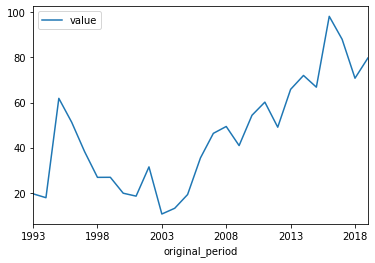

In [148]:
#the tendency for import from Georgia
data['GE'].plot(x ='original_period', y='value', kind = 'line')

In [ ]:
Problem 4

In [30]:
api_key=""

In [56]:
def get_distance(origin, destination):
    data = requests.get(f"https://maps.googleapis.com/maps/api/distancematrix/json?origins={origin}+Armenia&destinations={destination}+Armenia&key={api_key}").json()
    return  data['rows'][0]['elements'][0]['distance']['text']

In [58]:
#distances between marzkentrons
cities = ['Ashtarak', 'Artashat', 'Armavir', 'Gavar', 'Hrazdan', 'Vanadzor', 'Gyumri', 'Kapan', 'Ijevan', 'Yeghegnadzor']
data = {"Origin":[], "Destination":[], "Distance":[]}
for o in range(len(cities)):
    for d in range(o+1,len(cities)):
        data["Origin"].append(cities[o])
        data["Destination"].append(cities[d])
        data["Distance"].append(get_distance(cities[o],cities[d]))

distanceDF = pd.DataFrame(data)
distanceDF

,Origin,Destination,Distance
0,Ashtarak,Artashat,51.9 km
1,Ashtarak,Armavir,39.6 km
2,Ashtarak,Gavar,104 km
3,Ashtarak,Hrazdan,64.2 km
4,Ashtarak,Vanadzor,98.6 km
5,Ashtarak,Gyumri,98.4 km
6,Ashtarak,Kapan,320 km
7,Ashtarak,Ijevan,143 km
8,Ashtarak,Yeghegnadzor,143 km
9,Artashat,Armavir,63.2 km


In [ ]:
Problem 5

In [2]:
class MenuSpider(scrapy.Spider):
    name = 'menu'
    start_urls = ['https://www.menu.am/home.html?status=all&sort=default']

    custom_settings = {
        "FEED_FORMAT":"json",
        "FEED_URI":"menu.json",
    }
    
    def parse(self, response):
        for item in response.css('.item'):
            yield {"title": item.css('.title ::attr(title)').extract()[0],
                  "hours": item.css('.new_list_time_block_inner ::text').extract()[0],
                   "rating": float(item.css('.new_rates_block ::text').extract()[0]) if len(item.css('.new_rates_block ::text').extract())>0 else 0,
                   "category": item.css('.restType ::text').extract()[0] ,
                   "link": "https://www.menu.am/" +item.css('.title ::attr(href)').extract()[0] 
                  }



In [3]:
scraper = CrawlerProcess()
scraper.crawl(MenuSpider)
scraper.start()

2020-07-31 11:15:07 [scrapy.utils.log] INFO: Scrapy 2.1.0 started (bot: scrapybot)
2020-07-31 11:15:07 [scrapy.utils.log] INFO: Versions: lxml 4.4.1.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 20.3.0, Python 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)], pyOpenSSL 19.0.0 (OpenSSL 1.1.1g  21 Apr 2020), cryptography 2.7, Platform Windows-10-10.0.18362-SP0
2020-07-31 11:15:07 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2020-07-31 11:15:07 [scrapy.crawler] INFO: Overridden settings:
{}
2020-07-31 11:15:07 [scrapy.extensions.telnet] INFO: Telnet Password: 44f10073685cbacb
2020-07-31 11:15:07 [py.warnings] WARNING: C:\Users\mherv\Anaconda3\lib\site-packages\scrapy\extensions\feedexport.py:210: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)

2020-07-31 

2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Օլիմպ Սպորտ Սնունդ', 'hours': '13:00 - 20:00', 'rating': 0, 'category': 'Գաստրոնոմ', 'link': 'https://www.menu.am//restaurant/olimp-sport.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Էլի ս Լահմաջուն', 'hours': '10:00 - 20:00', 'rating': 4.6, 'category': 'Սիրիական', 'link': 'https://www.menu.am//restaurant/elie-s-lahmajun.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Պիցցա Է Վինո', 'hours': '10:00 - 23:00', 'rating': 0, 'category': 'Եվրոպական, Իտալական', 'link': 'https://www.menu.am//restaurant/pizza-e-vino.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Տաք Կճուճ Ֆուդ Կորտ', 'hou

2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Քոֆի Հաուս', 'hours': '09:00 - 20:00', 'rating': 0, 'category': 'Սուրճ և Թեյ', 'link': 'https://www.menu.am//restaurant/coffee-house.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Լիմոնե', 'hours': '11:00 - 23:30', 'rating': 2.7, 'category': 'Իտալական', 'link': 'https://www.menu.am//restaurant/limone.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Կաֆե Եգեր', 'hours': '11:00 - 00:00', 'rating': 0, 'category': 'Գերմանական', 'link': 'https://www.menu.am//restaurant/cafe-jager.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Դե լա Ռոզ', 'hours': '10:00 - 00:00', 'rating': 3.0, 'category'

2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Սուշի Մուշի', 'hours': '24 ժամ', 'rating': 4.1, 'category': 'Ասիական, Ճապոնական', 'link': 'https://www.menu.am//restaurant/sushi-mushi.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Պասիֆլորա', 'hours': '24 ժամ', 'rating': 3.3, 'category': 'Ծաղիկներ և Փուչիկներ', 'link': 'https://www.menu.am//restaurant/pasion-flower.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Փարթիտտո', 'hours': '09:30 - 21:00', 'rating': 4.9, 'category': 'Ծաղիկներ և Փուչիկներ', 'link': 'https://www.menu.am//restaurant/partytto.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Արև Յոգա Նվեր Քարտ', 'hours': '10:30 

2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Anahit.am', 'hours': '24 ժամ', 'rating': 3.4, 'category': 'Ծաղիկներ և Փուչիկներ', 'link': 'https://www.menu.am//restaurant/anahitam.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Փարթի Թայմ', 'hours': '10:00 - 18:00', 'rating': 5.0, 'category': 'Ծաղիկներ և Փուչիկներ', 'link': 'https://www.menu.am//restaurant/party-time.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Սեգաֆրեդո', 'hours': '10:00 - 20:00', 'rating': 5.0, 'category': 'Եվրոպական, Սուրճ և Թեյ, Իտալական', 'link': 'https://www.menu.am//restaurant/segafredo-zanetti.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Արտ Լանչ', 'h

2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Կարաս Մաշտոցի 20', 'hours': '24 ժամ', 'rating': 4.3, 'category': 'Հայկական', 'link': 'https://www.menu.am//restaurant/karas-mashtots.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Բլեք Անգուս', 'hours': '09:00 - 04:00', 'rating': 4.6, 'category': 'Ամերիկյան', 'link': 'https://www.menu.am//restaurant/black-angus.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Բուրգեր Քինգ Հյուսիսային պողոտա', 'hours': '10:00 - 22:00', 'rating': 4.3, 'category': 'Ամերիկյան', 'link': 'https://www.menu.am//restaurant/burger-king-northern-ave.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Դեսիգուալ Դալմա

2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Գնդիկ Բոքոնիկ Լահմաջո', 'hours': '24 ժամ', 'rating': 4.3, 'category': 'Լահմաջո', 'link': 'https://www.menu.am//restaurant/gndik-boqonik-lahmajo.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Կինոլոգիական Միություն', 'hours': '10:00 - 20:00', 'rating': 4.5, 'category': 'Ընտանի կենդանիների կերեր', 'link': 'https://www.menu.am//restaurant/cynological-union.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Վահագնի Ռեստորան', 'hours': '12:00 - 21:00', 'rating': 0, 'category': 'Եվրոպական, Հայկական', 'link': 'https://www.menu.am//restaurant/the-vahakni-restaurant.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=d

2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Լայֆ Սրճարան', 'hours': '10:00 - 22:00', 'rating': 3.0, 'category': 'Եվրոպական', 'link': 'https://www.menu.am//restaurant/life-cafe.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Կրեպ', 'hours': '12:00 - 21:45', 'rating': 2.7, 'category': 'Քաղցրավենիք', 'link': 'https://www.menu.am//restaurant/crepe.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Երևանի Խաչապուրի հացատուն', 'hours': '09:00 - 21:00', 'rating': 2.9, 'category': 'Արցախյան, Հայկական', 'link': 'https://www.menu.am//restaurant/yerevani-khachapuri-hatsatun.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Գուստո', 'hours': '1

2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Արմատ Կաֆե Ռեստորան', 'hours': '10:00 - 23:00', 'rating': 0, 'category': 'Եվրոպական', 'link': 'https://www.menu.am//restaurant/armat-cafe-restaurant.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Բարբիքյու Հաուս', 'hours': '10:00 - 22:00', 'rating': 0, 'category': 'Հայկական', 'link': 'https://www.menu.am//restaurant/barbeque-house.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Ջի Էմ ս Սրճարան', 'hours': '12:00 - 00:00', 'rating': 5.0, 'category': 'Եվրոպական', 'link': 'https://www.menu.am//restaurant/gm-s-cafe.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Qyabab.am', 'hours': '10:0

2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Ջեռոց', 'hours': '11:00 - 21:30', 'rating': 0, 'category': 'Իտալական', 'link': 'https://www.menu.am//restaurant/jerots.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Դայմնդ Ռեստորան', 'hours': '10:00 - 00:00', 'rating': 5.0, 'category': 'Եվրոպական', 'link': 'https://www.menu.am//restaurant/diamond-restaurant.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Խինկալի Փարթի', 'hours': '10:00 - 00:00', 'rating': 0, 'category': 'Վրացական', 'link': 'https://www.menu.am//restaurant/khinkali-party.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Եգիպտական Շաուրմա', 'hours': '09:00 - 20:00', 'ra

2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Պուշկինի Ղարս', 'hours': '10:00 - 22:00', 'rating': 5.0, 'category': 'Արևելյան', 'link': 'https://www.menu.am//restaurant/pushkini-ghars.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Քամանչա Ռեստորան', 'hours': '10:00 - 23:00', 'rating': 4.0, 'category': 'Հայկական', 'link': 'https://www.menu.am//restaurant/qamancha-restaurant.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Վայն Ռեփաբլիկ', 'hours': '12:00 - 21:30', 'rating': 5.0, 'category': 'Եվրոպական, Թայլանդական', 'link': 'https://www.menu.am//restaurant/wine-republic.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'ՍԿԱՏ Բիր Հաուս'

2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Ինդիան Մեհակ Ռեստորան', 'hours': '13:00 - 22:30', 'rating': 4.2, 'category': 'Ասիական, Հնդկական', 'link': 'https://www.menu.am//restaurant/indian-mehak-restaurant.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Թոմի Հիլֆիգեր', 'hours': '10:30 - 21:30', 'rating': 5.0, 'category': 'ՆՎԵՐ ՔԱՐՏԵՐ', 'link': 'https://www.menu.am//restaurant/tommy-hilfiger-gift-card.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Մինուռ', 'hours': '09:00 - 22:00', 'rating': 0, 'category': 'Եվրոպական', 'link': 'https://www.menu.am//restaurant/minour.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Հարվի', 'hour

2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Յամ-Յամ Դոնաթս Աբովյան', 'hours': '11:00 - 20:00', 'rating': 4.5, 'category': 'Քաղցրավենիք, Ամերիկյան', 'link': 'https://www.menu.am//restaurant/yum-yum-donuts-yerevan.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Օստ Բիստրո', 'hours': '10:30 - 21:30', 'rating': 4.2, 'category': 'Արևելյան, Հայկական', 'link': 'https://www.menu.am//restaurant/ost-bistro-mashtots.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Սաբթայթլ', 'hours': '10:00 - 23:59', 'rating': 4.6, 'category': 'Ամերիկյան, Բուրգեր և Սենդվիչ', 'link': 'https://www.menu.am//restaurant/subtitle.html'}
2020-07-31 11:15:08 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=defa

2020-07-31 11:15:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': '21 Սուշի Քլաբ', 'hours': '24 ժամ', 'rating': 4.2, 'category': 'Ճապոնական', 'link': 'https://www.menu.am//restaurant/21-sushi-club.html'}
2020-07-31 11:15:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Թոշկա', 'hours': '11:00 - 18:00', 'rating': 3.0, 'category': 'Սիրիական', 'link': 'https://www.menu.am//restaurant/toshka.html'}
2020-07-31 11:15:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Բուկինիստ Գրախանութների Ցանց', 'hours': '10:00 - 21:00', 'rating': 0, 'category': 'ՆՎԵՐ ՔԱՐՏԵՐ', 'link': 'https://www.menu.am//restaurant/bookinist-bookstores-chain-gift-card.html'}
2020-07-31 11:15:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Սերվիս Լենդ', 'hours'

2020-07-31 11:15:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Հայաթ Շաուրմա', 'hours': '11:00 - 21:00', 'rating': 5.0, 'category': 'Արաբական', 'link': 'https://www.menu.am//restaurant/hayat-shaurma.html'}
2020-07-31 11:15:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Նաիրիան Նվեր Քարտ', 'hours': '10:00 - 20:00', 'rating': 0, 'category': 'ՆՎԵՐ ՔԱՐՏԵՐ', 'link': 'https://www.menu.am//restaurant/nairian-gift-card.html'}
2020-07-31 11:15:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Մաթևոսյան Վայն', 'hours': '10:00 - 17:00', 'rating': 5.0, 'category': 'Ըմպելիքներ և Խորտիկներ', 'link': 'https://www.menu.am//restaurant/matevosyan-wine.html'}
2020-07-31 11:15:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.menu.am/home.html?status=all&sort=default>
{'title': 'Հեյզ', 'hours

In [4]:
df = pd.read_json('menu.json')

In [5]:
#grouping by category, getting mean and sorting by rating
df.groupby('category').mean().sort_values('rating', ascending=False).head()

,rating
category,
"Արտադրված է Հայաստանում, Գրքեր, Եվրոպական",5.0
Հացաբուլկեղեն,5.0
"Եվրոպական, Սուրճ և Թեյ, Իտալական",5.0
Արաբական,5.0
"Միրգ և բանջարեղեն, Հայկական",5.0


In [9]:
#function to get count of restaurant that close extactly or sooner than {hour}
def closed_before(hour):
    count = 0
    for index, row in df.iterrows():
        closing_time = row['hours'][8:].strip()
        if len(closing_time[:2])>0:
            if int(closing_time[:2]) < hour and  int(closing_time[:2]) > 10: 
                count = count + 1
            elif int(closing_time[:2]) == hour:
                if int(closing_time[3:]) == 0:
                    count = count + 1
    return count

In [10]:
#there are 51 restaurants that close extactly or sooner than 7pm
closed_before(19)

51